## ABD Beyzbol Ligi Oyuncularının On Üç Farklı Makine Öğrenimi Modeliyle Maaş Tahmin Projesi

Bu projede, herhangi bir ABD Beyzbol Ligi oyuncusunun maaşını tahmin etmek için on üç farklı makine öğrenimi modeli kullanılacaktır.Aşağıda açıklanan Hitters verileri, beyzbol oyuncularının maaşlarını tahmin etmek için kullanılacaktır.Veriler "https://www.kaggle.com" adresinden alınacaktır.

### Açıklama

#### Baglantı

Bu veri seti, R-package ISLR'nin bir parçasıdır ve ilgili kitapta G. James ve diğerleri tarafından kullanılmaktadır. (2013) Ridge regresyonunun ve LASSO'nun R kullanılarak nasıl gerçekleştirildiğini göstermek için "R'deki uygulamalarla İstatistiksel Öğrenmeye Giriş".

### İçerik

Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde tutulan StatLib kütüphanesinden alınmıştır.Bu, 1988 ASA Grafik Bölümü Poster Oturumunda kullanılan verilerin bir parçasıdır.Maaş verileri aslen Sports Illustrated, 20 Nisan 1987'den alınmıştır.1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanan 1987 Beyzbol Ansiklopedisi Güncellemesinden elde edildi.

### Format

Aşağıdaki 20 değişken üzerinde büyük lig oyuncularının 322 gözlemini içeren bir veri çerçevesi.

- AtBat 1986'da vuruş sayısı
- Hits 1986'daki isabet sayısı
- HmRun 1986'da ev sahibi koşu sayısı
- Runs 1986 yılındaki koşu sayısı
- RBI 1986 yılında atışla birlikte yapılan koşu sayısı
- Walks 1986'daki yürüyüş sayısı
- Years büyük liglerdeki yıl sayısı
- CAtBat kariyeri boyunca vuruş sayısı
- CHits kariyeri boyunca isabet sayısı
- CHmRun kariyeri boyunca ev sahibi koşu sayısı
- CRuns kariyeri boyunca koşu sayısı
- CRBI kariyeri boyunca atışla birlikte yapılan koşu sayısı
- CWalks kariyeri boyunca yaptığı yürüyüş sayısı
- A ve N seviyelerine sahip A Ligi faktörü, 1986 sonunda oyuncunun ligini gösterir.
- 1986 sonunda oyuncunun bölünmesini gösteren E ve W seviyelerine sahip Division A faktörü
- PutOut'lar 1986'da dışarı çıkanların sayısı
- Asist 1986'daki asist sayısı
- Errors 1986'daki hata sayısı
- Salary 1987 açılış gününde binlerce dolar yıllık maaş
- NewLeague 1987'nin başında oyuncunun ligini gösteren A ve N seviyelerine sahip A faktörü

In [1]:
# Gerekli algoritmaları yükleme

!pip install xgboost
!pip install lightgbm
!pip install catboost

In [2]:
### Gerekli kütüphaneleri yükleme 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [3]:
### Kaggle sunucusundan Hitters verilerini okuma

df = pd.read_csv("Hitters.csv")  

## Veriyi Anlamak

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [7]:
df.shape

(322, 20)

In [8]:
### Eksik değerleri bulma

df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [9]:
### Eksik değerleri görselleştirmek için aşağıdaki paketi yüklemem gerekiyor

conda install -c conda-forge/label/cf202003 missingno


SyntaxError: invalid syntax (<ipython-input-9-03ca40eb8aff>, line 3)

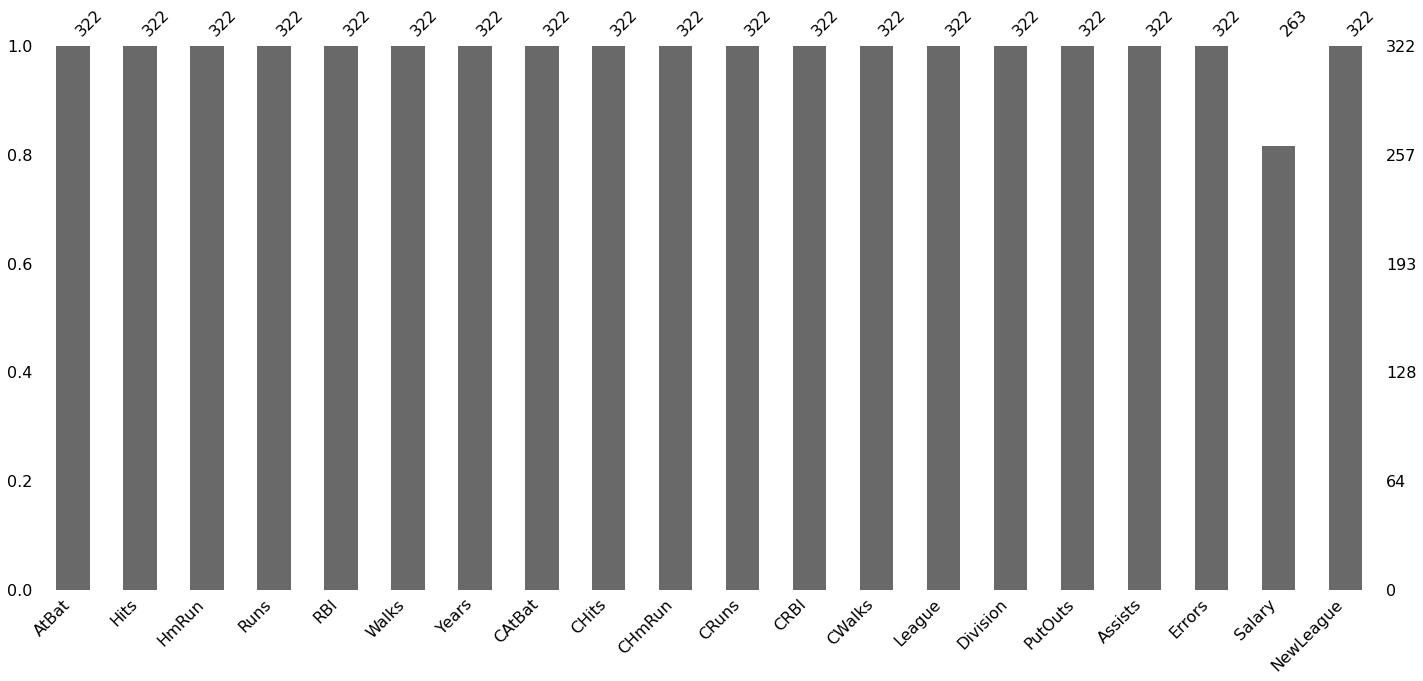

In [10]:
# Eksik değerleri görselleştirme

import missingno as msno
msno.bar(df);

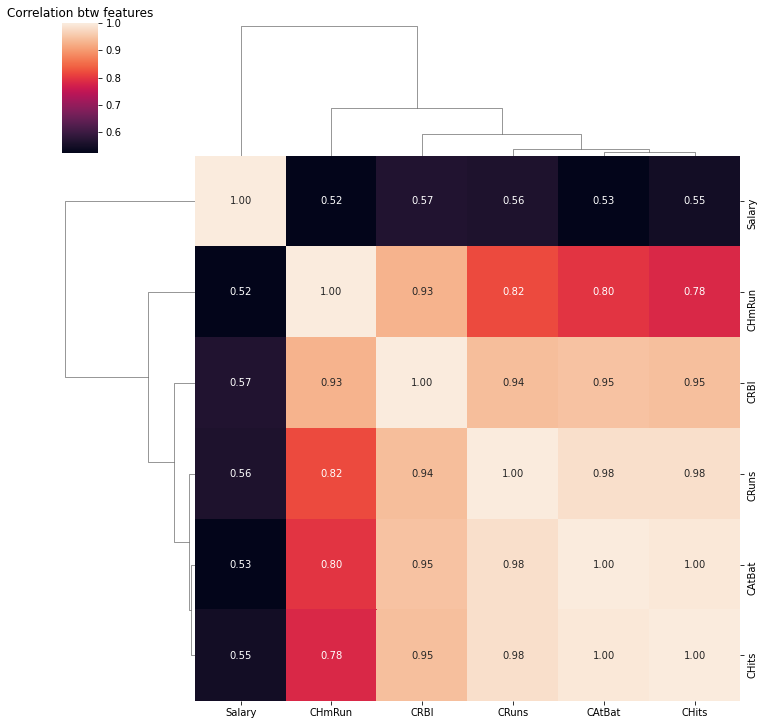

In [11]:
# Özellikler arasında 0,5'ten büyük korelasyon değerleri (>0,5 olduğu için sadece 0,5'in üzerindeki değerleri görebiliyorum)

correlation_matrix = df.corr().round(2)
filtre=np.abs(correlation_matrix['Salary'])>0.50
corr_features=correlation_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt=".2f")
plt.title('Correlation btw features')
plt.show()

In [12]:
# Bazı değişkenler arasında çok yüksek korelasyon olmasına rağmen hiçbir şey yapmayacağım. Normalde bu sorun çözülmelidir.
# Burada eksik değerleri sileceğim

df = df.dropna()

In [13]:
df.shape

(263, 20)

In [14]:
df.sort_values('Salary', ascending = False).head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
100,495,151,17,61,84,78,10,5624,1679,275,884,1015,709,A,E,1045,88,13,2460.000,A
163,618,200,20,98,110,62,13,7127,2163,351,1104,1289,564,A,E,330,16,8,2412.500,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
82,677,238,31,117,113,53,5,2223,737,93,349,401,171,A,E,1377,100,6,1975.000,A
229,514,144,0,67,54,79,9,4739,1169,13,583,374,528,N,E,229,453,15,1940.000,N


In [15]:
# 3 kategorik değişkenim var

df['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [16]:
df['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [17]:
df['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [18]:
# Nominal değişkenleri tek bir sıcak kodlama yöntemiyle dönüştürme. Normalde, kukla değişkenler için etiket kodlama değişkeni uygulanabilir. 3 veya daha fazla kategoriye sahip nominal değişkenler için bir sıcak kodlama uygundur

df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)

In [19]:
# Aykırı değerleri tespit etmek için LocalOutlierFactor kullanacağım. 20 ve 'auto' varsayılan değerlerini kullanacağım.

clf=LocalOutlierFactor(n_neighbors=20, contamination='auto')
clf.fit_predict(df)
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-6.22764656, -4.12325749, -3.14372723, -2.46482586, -2.37903838,
       -1.93271815, -1.92868899, -1.90888428, -1.6775256 , -1.66536304,
       -1.62626849, -1.48361164, -1.48216262, -1.44345727, -1.43603775,
       -1.42239393, -1.40734739, -1.38353101, -1.37252134, -1.3532077 ])

In [20]:
?LocalOutlierFactor

Init signature:
LocalOutlierFactor(
    n_neighbors=20,
    *,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto',
    novelty=False,
    n_jobs=None,
)
Docstring:     
Unsupervised Outlier Detection using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor.
It measures the local deviation of density of a given sample with
respect to its neighbors.
It is local in that the anomaly score depends on how isolated the object
is with respect to the surrounding neighborhood.
More precisely, locality is given by k-nearest neighbors, whose distance
is used to estimate the local density.
By comparing the local density of a sample to the local densities of
its neighbors, one can identify samples that have a substantially lower
density than their neighbors. These are considered outliers.

.. versionadded:: 0.19

Parameters
----------
n_neighbors : int, default=20
    Number of neighbors t

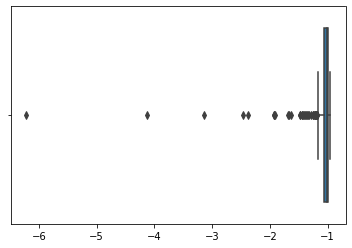

In [21]:
# Beş değerden sonraki değerler yakın düşerken 5. değeri eşik olarak alacağım
# Ancak ilk başta bu durumu aykırı değerlerle ilgili olarak görselleştireceğim.

sns.boxplot(df_scores);

In [22]:
threshold=np.sort(df_scores)[5]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-1.9327181498464339


In [23]:
df.shape

(257, 20)

In [24]:
# Standardization
# Aşağıdaki satırlarda bazı işlemler yapacağım.
# Maaş benim bağımlı değişkenim, diğerleri kukla değişkenler. İlk başta onları bağımsız değişken kümemden (X) çıkaracağım.
# Sonunda tüm bağımsız değişkenleri birleştireceğim

df_X=df.drop(['Salary','League_N','Division_W','NewLeague_N'], axis=1)
df_X.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9
1,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19
2,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0
3,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22
4,202,53,4,31,26,27,9,1876,467,15,192,186,161,304,45,11


In [25]:
from sklearn.preprocessing import StandardScaler
scaled_cols=StandardScaler().fit_transform(df_X)



scaled_cols=pd.DataFrame(scaled_cols, columns=df_X.columns)
scaled_cols.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743
1,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756
2,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969
3,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660
4,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346


In [26]:
cat_df=df.loc[:, "League_N":"NewLeague_N"]
cat_df.head()

,League_N,Division_W,NewLeague_N
0,0,1,0
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1


In [27]:
Salary=pd.DataFrame(df['Salary'])

In [28]:
df=pd.concat([Salary,scaled_cols, cat_df], axis=1)
df.head()

,Salary,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,100.000,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743,0,1,0
1,75.000,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756,1,1,1
2,1100.000,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969,0,0,0
3,517.143,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660,0,0,0
4,512.500,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346,1,1,1


In [29]:
#Bağımlı değişken y = Maaş, bağımsız değişkenler x = maaşsız değişkenler

y = df['Salary']
X = df.drop('Salary', axis =1)

In [30]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,-0.718286,-0.772974,-1.328611,-1.207896,-1.064777,-1.568744,-0.902646,-0.939501,-0.947471,-0.843844,-0.967966,-0.907090,-0.939295,-0.596425,1.133526,0.068743,0,1,0
1,-0.548505,-0.595465,-0.644793,-1.129693,-0.755745,-1.522804,-1.111826,-1.012932,-0.981368,-0.770829,-0.995101,-0.916355,-0.954354,-0.517052,1.181824,1.591756,1,1,1
2,-0.018788,-0.351391,0.608873,-0.230351,0.557640,1.095761,1.189149,1.113530,0.938454,2.234972,1.272122,1.727355,2.275692,-1.032980,-0.819115,-1.301969,0,0,0
3,1.156096,1.135243,1.064751,2.037555,0.905301,0.820123,0.561610,0.862201,0.889148,0.251387,1.024898,0.535215,0.852665,-0.174302,2.251292,2.048660,0,0,0
4,-1.370245,-1.216745,-0.872732,-0.934184,-0.987519,-0.649949,0.352431,-0.341993,-0.394328,-0.661306,-0.512713,-0.446911,-0.378366,0.063819,-0.508625,0.373346,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.633171,0.425209,-0.530823,0.395278,-0.137681,-0.190552,-0.484287,0.019484,0.127999,-0.454429,0.051078,-0.060856,-0.464953,0.139585,-0.757017,-0.845065,1,0,1
253,0.599215,0.624906,-0.758763,0.825398,-0.060424,2.428014,0.979969,1.246844,1.214255,-0.369244,1.612808,0.371527,2.309574,0.096290,1.809706,1.744058,0,0,0
254,0.483764,0.403020,-0.986702,0.238871,-0.330826,0.498545,-0.275108,-0.418922,-0.446715,-0.758659,-0.437340,-0.734137,-0.434836,-0.899488,-0.039439,-0.235860,0,1,0
255,1.149305,0.802414,-0.302884,1.177315,0.325866,1.692978,0.143251,0.235845,0.206579,0.336572,0.325436,0.275785,0.265384,3.707790,0.084757,0.525647,0,0,0


In [31]:
y

0       100.000
1        75.000
2      1100.000
3       517.143
4       512.500
         ...   
252     700.000
253     875.000
254     385.000
255     960.000
256    1000.000
Name: Salary, Length: 257, dtype: float64

In [32]:
# Model sonuçlarımızı tahmin edilen değişkenin (y) ortalama değerine göre değerlendireceğiz.

y.mean()

539.2295992217898

### MODELLEME 

In [33]:
# Train ve test ayırma süreci ve train ve test boyutunun belirlenmesi
# Modelleri karşılaştırmak için tüm modeller için test boyutu verilerin %20'si ve rastgele durum 46 olacaktır.

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

### Linear Regression


In [34]:
ridreg = Ridge()
model = ridreg.fit(X_train, y_train)
y_pred = model.predict(X_test)
df_ridreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridreg_rmse 

315.28976474517196

### Lasso Regression 

In [35]:
lasreg = Lasso()
model = lasreg.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_lasreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_lasreg_rmse

318.6803120461422

### Elastic Net Regression

In [36]:
enet = ElasticNet()
model = enet.fit(X_train,y_train)
y_pred = model.predict(X_test)
df_enet_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_rmse

302.78610988935907

### KNN (K-Nearest Neighbors )

In [37]:
knn = KNeighborsRegressor()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
df_knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_knn_rmse

315.07079037040967

### SVR (support Vector Regression)

In [38]:
svr = SVR("linear")
svr_model = svr.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
df_svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_svr_rmse

278.85157251429393

### MLP (Multilayer Perceptron)
One of the Artificial Neural Network Models (ANN)

In [39]:
mlp = MLPRegressor()
mlp_model = mlp.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
df_mlp_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_mlp_rmse

514.898354766454

### CART (Classification and Regression Trees)

In [40]:
cart = DecisionTreeRegressor()
cart_model = cart.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
df_cart_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_cart_rmse

428.1806398479681

### Random Forests

In [41]:
rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
df_rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_rf_rmse

284.5394676691895

### GBM (Gradient Boosting Machines)

In [42]:
gbm = GradientBoostingRegressor()
gbm_model = gbm.fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
df_gbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_gbm_rmse

267.3247955953076

### XGBoost (Extreme Gradient Boosting)

In [43]:
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
df_xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_xgb_rmse

324.3984254581684

### LightGBM

In [44]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
df_lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lgbm_rmse

276.06253566372055

### CatBoost (Category Boosting)

In [45]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)
y_pred = catb_model.predict(X_test)
df_catb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_catb_rmse

Learning rate set to 0.029437
0:	learn: 471.6018354	total: 316ms	remaining: 5m 15s
1:	learn: 464.5806381	total: 322ms	remaining: 2m 40s
2:	learn: 458.0766392	total: 327ms	remaining: 1m 48s
3:	learn: 451.8490791	total: 332ms	remaining: 1m 22s
4:	learn: 445.6296077	total: 337ms	remaining: 1m 7s
5:	learn: 440.0957215	total: 341ms	remaining: 56.5s
6:	learn: 435.1083799	total: 344ms	remaining: 48.8s
7:	learn: 429.2321315	total: 347ms	remaining: 43.1s
8:	learn: 423.0557357	total: 350ms	remaining: 38.6s
9:	learn: 417.7807447	total: 354ms	remaining: 35s
10:	learn: 412.8369072	total: 357ms	remaining: 32.1s
11:	learn: 408.4064884	total: 360ms	remaining: 29.7s
12:	learn: 402.6927357	total: 364ms	remaining: 27.6s
13:	learn: 397.9132016	total: 367ms	remaining: 25.8s
14:	learn: 393.2047282	total: 369ms	remaining: 24.2s
15:	learn: 388.3594596	total: 371ms	remaining: 22.8s
16:	learn: 384.0940179	total: 372ms	remaining: 21.5s
17:	learn: 379.6927458	total: 374ms	remaining: 20.4s
18:	learn: 375.5546320	t

258.90197830660554

In [46]:
# On üç modelin Kök Ortalama Kare Hataları (RMSE)
# CatBoostRegressor'u dahil ettiğimde yaklaşık 2 saat sürdüğü için CatBoostRegressor'u dahil etmeyeceğim.
# Zaman kazanmak için ayrı ayrı rapor edeceğim

def compML(df, y, alg):
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_name = alg.__name__
    print(model_name, "Model RMSE:", RMSE)

In [47]:
models = [LinearRegression, Ridge, Lasso, ElasticNet, KNeighborsRegressor, SVR, MLPRegressor, DecisionTreeRegressor, 
          RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor] 

In [48]:
for model in models:
    compML(df, 'Salary', model)

LinearRegression Model RMSE: 327.3400731081062
Ridge Model RMSE: 315.28976474517196
Lasso Model RMSE: 318.6803120461422
ElasticNet Model RMSE: 302.78610988935907
KNeighborsRegressor Model RMSE: 315.07079037040967
SVR Model RMSE: 330.74557635195526
MLPRegressor Model RMSE: 504.8537701381368
DecisionTreeRegressor Model RMSE: 396.43616802451504
RandomForestRegressor Model RMSE: 283.7196858255249
GradientBoostingRegressor Model RMSE: 267.87313763660774
XGBRegressor Model RMSE: 324.3984254581684
LGBMRegressor Model RMSE: 276.06253566372055


### Temel makine öğrenimi modelleri arasında CatBoost (Kategori Yükseltme) modeli, 258.90197830660554 RMSE değeri ile maaş tahmininde en iyi modeldir.

## Model Tuning

### Ridge Regression Model Tuning

In [49]:
# Çapraz doğrulama işleviyle hiper parametre optimizasyonu.
# Yeni alfa değerleri atayarak modeli ayarlamaya çalışacağız.
# Ridge regresyonunda varsayılan alfa değeri 1.0'dır. Farklı değerler deneyeceğiz.
# En uygun alfa değeri veya parametresi nihai modelde kullanılacaktır.

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 

ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)
df_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridge_tuned_rmse

326.89105254127037

### Lasso Regression Model Tuning

In [50]:
# Çapraz doğrulama işleviyle hiper parametre optimizasyonu.
# Yeni alfa değerleri atayarak modeli ayarlamaya çalışacağız.
# Kement regresyonunda varsayılan alfa değeri 1.0'dır. Farklı değerler deneyeceğiz.
# En uygun alfa değeri veya parametresi nihai modelde kullanılacaktır.

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

# Final Model 

lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
df_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lasso_tuned_rmse

323.4231245802036

In [51]:
?Lasso

Init signature:
Lasso(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
alpha : float, default=1.0
    Constant that multiplies the L1 term. Defaults to 1.0.
    ``alpha = 0`` is equivalent to an ordinary least square, solved
    by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.

fit

### Elastic Net Regression Regression Model Tuning

In [52]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read

In [53]:
# Çapraz doğrulama işleviyle hiper parametre optimizasyonu.
# Yeni alfa değerleri atayarak modeli ayarlamaya çalışacağız.
# ElesticNet regresyonunda varsayılan alfa değeri 1.0 ve varsayılan l1_ratio 0,5'tir. Farklı değerler deneyeceğiz.
# En uygun değerler veya parametreler nihai modelde kullanılacaktır.

enet_params = {"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}
enet = ElasticNet()
enet_model = enet.fit(X_train,y_train)
enet_cv = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)
enet_cv.best_params_

#Final Model 

enet_tuned = ElasticNet(**enet_cv.best_params_).fit(X_train,y_train)
y_pred = enet_tuned.predict(X_test)
df_enet_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_enet_tuned_rmse 

295.9805666186622

### KNN (K-Nearest Neighbors) Model Tuning

In [54]:
?knn

Type:        KNeighborsRegressor
String form: KNeighborsRegressor()
File:        c:\users\toshiba\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py
Docstring:  
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which ac

In [55]:
# n_neighbors : int, default=5 Varsayılan olarak kullanılacak komşu sayısı :meth:`kneighbors` sorguları.

knn_params = {"n_neighbors": np.arange(2,30,1)}
knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)
knn_cv_model.best_params_
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

# Final Model

y_pred = knn_tuned.predict(X_test)
df_knn_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_knn_tuned_rmse

289.1071265271843

In [56]:
knn_cv_model.best_params_

{'n_neighbors': 9}

In [57]:
knn_cv_model.best_estimator_

KNeighborsRegressor(n_neighbors=9)

### SVR (Support Vector Regression) Model Tuning

In [58]:
?svr

Type:        SVR
String form: SVR(kernel='linear')
File:        c:\users\toshiba\anaconda3\lib\site-packages\sklearn\svm\_classes.py
Docstring:  
Epsilon-Support Vector Regression.

The free parameters in the model are C and epsilon.

The implementation is based on libsvm. The fit time complexity
is more than quadratic with the number of samples which makes it hard
to scale to datasets with more than a couple of 10000 samples. For large
datasets consider using :class:`sklearn.svm.LinearSVR` or
:class:`sklearn.linear_model.SGDRegressor` instead, possibly after a
:class:`sklearn.kernel_approximation.Nystroem` transformer.

Read more in the :ref:`User Guide <svm_regression>`.

Parameters
----------
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
     Specifies the kernel type to be used in the algorithm.
     It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
     a callable.
     If none is given, 'rbf' will be used. If a callable is given 

In [59]:
# C : float, default=1.0 Düzenlileştirme parametresi. Düzenlileştirmenin gücü C ile ters orantılıdır. Kesinlikle pozitif olmalıdır.

svr_params = {'C': [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, n_jobs = -1, verbose =  2).fit(X_train, y_train)
svr_tuned = SVR('linear', **svr_cv_model.best_params_).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
df_svr_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_svr_tuned_rmse

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.2s finished


278.85157251429393

In [60]:
svr_cv_model.best_params_

{'C': 1}

In [61]:
svr_cv_model.best_estimator_

SVR(C=1, kernel='linear')

### MLP (Multilayer Perceptron) Model Tuning
Yapay sinir ağı modellerinden biri(ANN)

In [62]:
?mlp

Type:        MLPRegressor
String form: MLPRegressor()
File:        c:\users\toshiba\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron regressor.

This model optimizes the squared-loss using LBFGS or stochastic gradient
descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
 

In [64]:
# hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,) 
# alpha : float, default=0.0001

mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)
mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X_train, y_train)
y_pred = mlp_tuned.predict(X_test)
df_mlp_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_mlp_tuned_rmse

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.6min finished


419.6322576217184

In [65]:
mlp_cv_model.best_params_

{'alpha': 0.02, 'hidden_layer_sizes': (1000, 100, 10)}

In [66]:
mlp_cv_model.best_estimator_

MLPRegressor(alpha=0.02, hidden_layer_sizes=(1000, 100, 10))

### CART (Classification and Regression Trees) Model Tuning

In [67]:
?cart

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\toshiba\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "b

- max_depth : int, default=None Ağacın maksimum derinliği. Hiçbiri ise, tüm yapraklar saf olana veya tüm yapraklar min_samples_split örneklerinden daha azını içerene kadar düğümler genişletilir.
- min_samples_split : int or float, default=2 Bir dahili düğümü bölmek için gereken minimum örnek sayısı:
       *İnt ise, min_samples_split'i minimum sayı olarak kabul edin.
       *Float ise, min_samples_split bir kesirdir ve ceil(min_samples_split * n_samples) her bölme için minimum örnek sayısıdır.

In [68]:
cart_params = {"max_depth": [2,3,4,5,10,20, 100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
df_cart_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_cart_tuned_rmse

399.6353867178006

In [69]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 30}

In [70]:
cart_cv_model.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_split=30)

### Random Forests  Model Tuning

In [71]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the fore

* RandomForestRegressor varsayılan değerleri:

-n_estimators=100,

* criterion='mse',
* max_depth=None,
* min_samples_split=2
* n_jobs=None,
* verbose=0

In [72]:
rf_params = {"max_depth": [5,8,10,None],
            "max_features": [2,5,10,15,17],
            "n_estimators": [100,200, 500, 1000],
            "min_samples_split": [2,5,10,20,30]}
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
df_rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_rf_tuned_rmse

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 13.7min finished


261.882609744023

In [73]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [74]:
rf_cv_model.best_estimator_

RandomForestRegressor(max_depth=10, max_features=2, n_estimators=200)

### GBM (Gradient Boosting Machines) Model Tuning

In [75]:
?gbm

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\users\toshiba\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, default='ls'
    loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'quantile'
    allows quantile regression (use `alpha` to specify the quantile).

learning_rate : float, default=0.1
    learning rate shrinks the contribution 

~ Parametreler

* kayıp: {'ls', 'lad', 'huber', 'quantile'}, default = 'ls'

Kayıp fonksiyonu optimize edilecek. 'ls' en küçük kareler regresyonunu ifade eder.'lad' (en küçük mutlak sapma), yalnızca girdi değişkenlerinin sıra bilgisine dayanan oldukça sağlam bir kayıp işlevidir. 'huber' ikisinin birleşimidir. 'quantile'' niceliksel regresyona izin verir (quantile' belirtmek için alfa kullanın).
* learning_rate : float, default=0.1

Öğrenme oranı, öğrenme hızı ile her ağacın katkısını küçültür. Learning_rate ve n_estimators arasında bir değiş tokuş vardır.
* n_estimators : int, default=100

Gerçekleştirilecek güçlendirme aşamalarının sayısı.Gradyan artırma, aşırı takmaya karşı oldukça dayanıklıdır, bu nedenle çok sayıda olması genellikle daha iyi performans sağlar.
* subsample : float, default=1.0

Bireysel temel öğrencilere uydurmak için kullanılacak örneklerin oranı. 1.0'dan küçükse, bu Stokastik Gradyan Artışı ile sonuçlanır.alt örnek, n_estimators parametresi ile etkileşime girer. Alt numunenin < 1.0 seçilmesi, varyansın azalmasına ve sapmada bir artışa yol açar.
* max_depth : int, default=3

Bireysel regresyon tahmincilerinin maksimum derinliği. Maksimum derinlik, ağaçtaki düğüm sayısını sınırlar. En iyi performans için bu parametreyi ayarlayın; en iyi değer, girdi değişkenlerinin etkileşimine bağlıdır.

In [76]:
# Bu işlem çok uzun sürüyor, bu nedenle kodu cv = 10 yerine cv =5 ile çalıştırmak daha iyi olur.

gbm_params = {"learning_rate": [0.001,0.1,0.01, 0.05],
             "max_depth": [1,2,3,5,8,9,10],
             "n_estimators": [50,100,200,500,1000],
             "subsample": [2,1.5,1,0.4,0.5,0.7],
             "loss": ["ls","lad","quantile"]}                  
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)                             
y_pred = gbm_tuned.predict(X_test)                             
df_gbm_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))                             
df_gbm_tuned_rmse      

Fitting 10 folds for each of 2520 candidates, totalling 25200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 754 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2516 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3298 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3968 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4994 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5914 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 7198 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 8640 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 9925 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 11348 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 12731 tasks     

250.91525172248444

In [77]:
gbm_cv_model.best_params_

{'learning_rate': 0.05,
 'loss': 'lad',
 'max_depth': 2,
 'n_estimators': 1000,
 'subsample': 0.5}

In [78]:
gbm_cv_model.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, loss='lad', max_depth=2,
                          n_estimators=1000, subsample=0.5)

### XGBoost (Extreme Gradient Boosting) Model Tuning

In [79]:
?xgb

Type:        XGBRegressor
String form:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bynode <...> s_weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gb

In [80]:

xgb_params = {"learning_rate": [0.1,0.01,0.5,0.7,0.8],
             "max_depth": [3,4,5,6,7,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.5,0.7,0.8,0.9]}
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
df_xgb_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_xgb_tuned_rmse

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 1122 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 1858 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 2385 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2992 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3681 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4450 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  2.4min finished


277.1273319664687

In [81]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 500}

In [82]:
xgb_cv_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### LightGBM Model Tuning

In [83]:
?lgbm

Type:           LGBMRegressor
String form:    LGBMRegressor()
File:           c:\users\toshiba\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM regressor.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (d

In [ ]:
#learning_rate default = 0.1, n_estimators default = 100, colsample_bytree default = 1, max_depth default = -1, n_jobs default=-1)

In [84]:
lgbm_params = {"learning_rate": [0.01,0.001, 0.1, 0.5, 1],
              "n_estimators": [50,80,100,200,500,1000],
              "max_depth": [-1.5, -1.3, -1, 0.3, 0.5,0.7,2,4,6,7,10],
              "colsample_bytree": [0.1,0.3,0.5,0.7,1,1.3,1.5]}
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)
lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)                              
y_pred = lgbm_tuned.predict(X_test)                              
df_lgbm_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))                              
df_lgbm_tuned_rmse  

Fitting 10 folds for each of 2310 candidates, totalling 23100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 2344 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 4608 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 7528 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 11088 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 13376 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 16596 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 23100 out of 23100 | elapsed:  2.3min finished


275.41846202275894

In [85]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': -1,
 'n_estimators': 50}

In [86]:
lgbm_cv_model.best_estimator_

LGBMRegressor(colsample_bytree=0.3, n_estimators=50)

### CatBoost (Category Boosting)

In [87]:
?catb

Type:            CatBoostRegressor
String form:     <catboost.core.CatBoostRegressor object at 0x000001DD0AD0BB50>
File:            c:\users\toshiba\anaconda3\lib\site-packages\catboost\core.py
Docstring:       <no docstring>
Class docstring: CatBoost model. Contains training, prediction and evaluation methods.
Init docstring: 
Initialize the CatBoost.

Parameters
----------
params : dict
    Parameters for CatBoost.
    If  None, all params are set to their defaults.
    If  dict, overriding parameters present in dict.


In [ ]:
# Hem 10 hem de 5 kat denedim. 5 kat (cv =5) ile yerleştirme (düşük) daha iyi sonuç verdi. 10 kat ile rmse değeri 255 iken, 5 kat ile 240 olmuştur.

In [88]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}
catb_cv_model = GridSearchCV(catb_model, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
catb_tuned = CatBoostRegressor(**catb_cv_model.best_params_).fit(X_train, y_train)                            
y_pred = catb_tuned.predict(X_test) 
df_catb_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))                            
df_catb_tuned_rmse                            

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   53.1s finished


0:	learn: 458.4632952	total: 808us	remaining: 403ms
1:	learn: 439.1158680	total: 1.47ms	remaining: 365ms
2:	learn: 421.8718599	total: 2.04ms	remaining: 338ms
3:	learn: 406.8068268	total: 2.68ms	remaining: 333ms
4:	learn: 391.1204598	total: 3.27ms	remaining: 324ms
5:	learn: 381.8107190	total: 3.84ms	remaining: 316ms
6:	learn: 370.0274807	total: 4.4ms	remaining: 310ms
7:	learn: 358.7262922	total: 4.97ms	remaining: 306ms
8:	learn: 348.5480164	total: 5.5ms	remaining: 300ms
9:	learn: 338.6785326	total: 6.05ms	remaining: 297ms
10:	learn: 330.6497064	total: 6.58ms	remaining: 292ms
11:	learn: 326.1322469	total: 7.14ms	remaining: 290ms
12:	learn: 319.6098815	total: 7.66ms	remaining: 287ms
13:	learn: 315.2128779	total: 8.21ms	remaining: 285ms
14:	learn: 310.7437324	total: 8.73ms	remaining: 282ms
15:	learn: 304.3962710	total: 9.29ms	remaining: 281ms
16:	learn: 299.6595157	total: 9.99ms	remaining: 284ms
17:	learn: 295.4833647	total: 10.6ms	remaining: 283ms
18:	learn: 292.0286526	total: 11.1ms	rema

240.56082365601893

In [89]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [90]:
catb_cv_model.best_estimator_

### Dört Temel ve Ayarlı Modelin Karşılaştırılabilir Sonuçları

In [94]:
ComparableResults_df = pd.DataFrame({"LINEAR":[df_ridreg_rmse],"RIDGE":[df_ridreg_rmse],"RIDGE TUNED":[df_ridge_tuned_rmse],
                             "LASSO":[df_lasreg_rmse],"LASSO TUNED":[df_lasso_tuned_rmse], 
                             "ELASTIC NET":[df_enet_rmse], "ELASTIC NET TUNED":[df_enet_tuned_rmse],
                             "KNN":[df_knn_rmse], "KNN TUNED":[df_knn_tuned_rmse],
                             "SVR":[df_svr_rmse], "SVR TUNED":[df_svr_tuned_rmse],
                             "MLP":[df_mlp_rmse], "MLP TUNED":[df_mlp_tuned_rmse],
                             "CART":[df_cart_rmse], "CART TUNED":[df_cart_tuned_rmse],
                             "RF":[df_rf_rmse], "RF TUNED":[df_rf_tuned_rmse],
                             "GBM":[df_gbm_rmse], "GBM TUNED":[df_gbm_tuned_rmse],
                             "XGBOOST":[df_xgb_rmse], "XGBOOST TUNED":[df_xgb_tuned_rmse],
                             "LightGBM":[df_lgbm_rmse], "LightGBM TUNED":[df_lgbm_tuned_rmse],
                             "CatBoost":[df_catb_rmse], "CatBoost TUNED":[df_catb_tuned_rmse]})

ComparableResults_df


,LINEAR,RIDGE,RIDGE TUNED,LASSO,LASSO TUNED,ELASTIC NET,ELASTIC NET TUNED,KNN,KNN TUNED,SVR,...,RF,RF TUNED,GBM,GBM TUNED,XGBOOST,XGBOOST TUNED,LightGBM,LightGBM TUNED,CatBoost,CatBoost TUNED
0,315.289765,315.289765,326.891053,318.680312,323.423125,302.78611,295.980567,315.07079,289.107127,278.851573,...,284.539468,261.88261,267.324796,250.915252,324.398425,277.127332,276.062536,275.418462,258.901978,240.560824


In [95]:
ComparableResults_df.min(axis = 1, skipna = True)

0    240.560824
dtype: float64

In [96]:
ComparableResults_df.idxmin(axis=1)

0    CatBoost TUNED
dtype: object

In [97]:
ComparableResults_df.T

,0
LINEAR,315.289765
RIDGE,315.289765
RIDGE TUNED,326.891053
LASSO,318.680312
LASSO TUNED,323.423125
ELASTIC NET,302.786110
ELASTIC NET TUNED,295.980567
KNN,315.070790
KNN TUNED,289.107127
SVR,278.851573



## Sonuçlar ve Çözüm


Bu projede, herhangi bir ABD Beyzbol Ligi oyuncusunun maaşını tahmin etmek için on üç farklı makine öğrenimi modeli kullanıldı. Doğrusal Regresyon, Ridge Regresyon, Kement Regresyon, ElasticNet Regresyon, KNN (K-En Yakın Komşular), SVR (Support Vector Regresyon), MLP (Çok Katmanlı Algılayıcı), CART (Sınıflandırma ve Regresyon Ağaçları), Random Forest (Rastgele Ormanlar), GBM (Gradient Boosting) kullanarak Machines), XGBoost (Extreme Gradient Boost), LightGBM ve CatBoost (Category Boosting) Machine Learning Modellerinde hata karelerinin kök ortalamaları (RMSE) değerleri hesaplandı. RMSE, tahminlerin gözlemlenen değerlerden ortalama sapmasının bir ölçüsüdür. Daha sonra hiperparametre optimizasyonları yardımıyla RMSE değerleri düşürülmeye çalışılmıştır. Tüm temel modeller ayarlandı. Sonuçlar, hem temel hem de ayarlanmış modelde, en düşük RMSE değerinin (258.901978 ve 240.560824), CatBoost (Kategori Yükseltme) Makine Öğrenimi modelinden elde edildiğini göstermiştir. En iyi Machine Learning modeli, 240.560824 RMSE değeri ile ayarlanmış CatBoost modeli oldu. Bu hata puanı, tahmin edilen değerin (539.2295992217898) ortalamasından oldukça uzaktır. Özetle, analizler ve tahmin sonuçları, ayarlanmış (optime edilmis) CatBoost (Kategori Arttırma) Makine Öğrenimi modelinin bir ABD Beyzbol Ligi oyuncusu maaşını tahmin etmek için en iyi model olduğunu açıkça ortaya koydu.